In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
sales = pd.read_csv('train.csv')

Viewing the shape of the dataset

In [174]:
sales.shape

(9800, 18)

In [175]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


now we drop the columns which arenot required. Here, i want to do the sales analysis of the products country wise, and sothe customer details are not needed and hence we drop those columns.

In [176]:
sales = sales.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Product ID'], axis = 1)
sales.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Now, we check for the null values

In [177]:
sales.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
dtype: int64

Check for the duplicate values. 

In [178]:
sales.duplicated().sum()

1

There is 1 duplicate value, and we drop that. 

In [179]:
sales.drop_duplicates(inplace=True)

In [180]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9799 non-null   object 
 1   Ship Date     9799 non-null   object 
 2   Ship Mode     9799 non-null   object 
 3   Segment       9799 non-null   object 
 4   City          9799 non-null   object 
 5   State         9799 non-null   object 
 6   Region        9799 non-null   object 
 7   Category      9799 non-null   object 
 8   Sub-Category  9799 non-null   object 
 9   Product Name  9799 non-null   object 
 10  Sales         9799 non-null   float64
dtypes: float64(1), object(10)
memory usage: 918.7+ KB


Changing the datatypes of order date and ship date to datetime. 

In [181]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

In [182]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9799 non-null   datetime64[ns]
 1   Ship Date     9799 non-null   datetime64[ns]
 2   Ship Mode     9799 non-null   object        
 3   Segment       9799 non-null   object        
 4   City          9799 non-null   object        
 5   State         9799 non-null   object        
 6   Region        9799 non-null   object        
 7   Category      9799 non-null   object        
 8   Sub-Category  9799 non-null   object        
 9   Product Name  9799 non-null   object        
 10  Sales         9799 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 918.7+ KB


Extracting month and year from the order date

In [183]:
sales['Order_year'] = sales['Order Date'].dt.year
sales['Order_Month'] = sales['Order Date'].dt.month_name()

Create dataframe with the cities with largest sales. 

In [184]:
#creating a dataframe for top 10 cities in sales
city_sales=pd.DataFrame(sales.groupby(sales['City']).sum()['Sales']).reset_index()
city_sales = city_sales.nlargest(10, 'Sales')
city_sales.head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


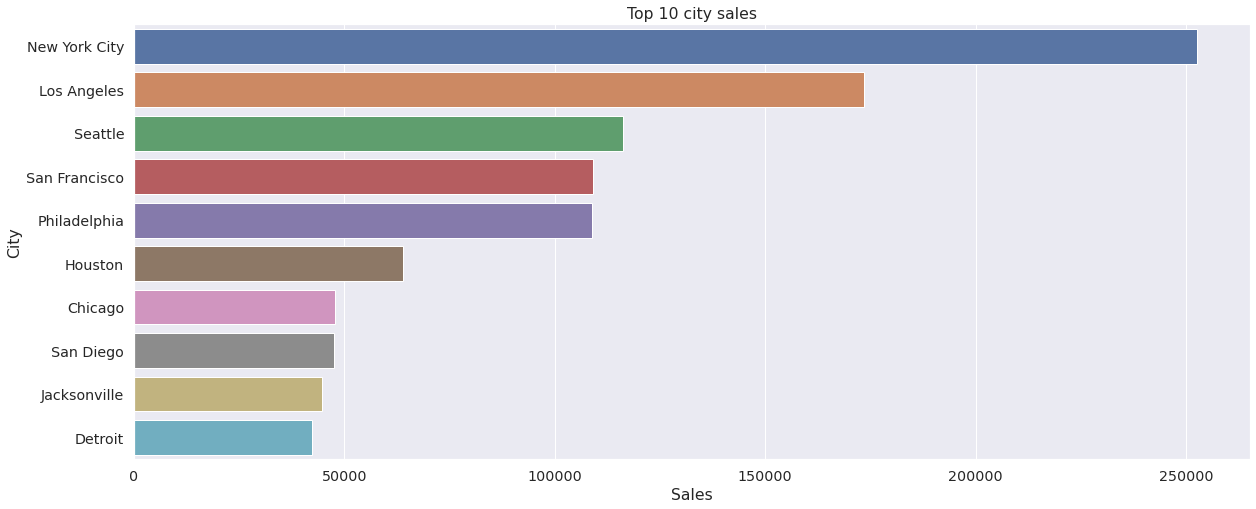

In [185]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top 10 city sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y='City',data = city_sales);

**Segement that generates the maximum sales**

In [186]:
segment_sales = pd.DataFrame(sales.groupby(sales['Segment']).sum()['Sales']).reset_index()
segment_sales = segment_sales.nlargest(3, 'Sales')
segment_sales.head()

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.247008e+05


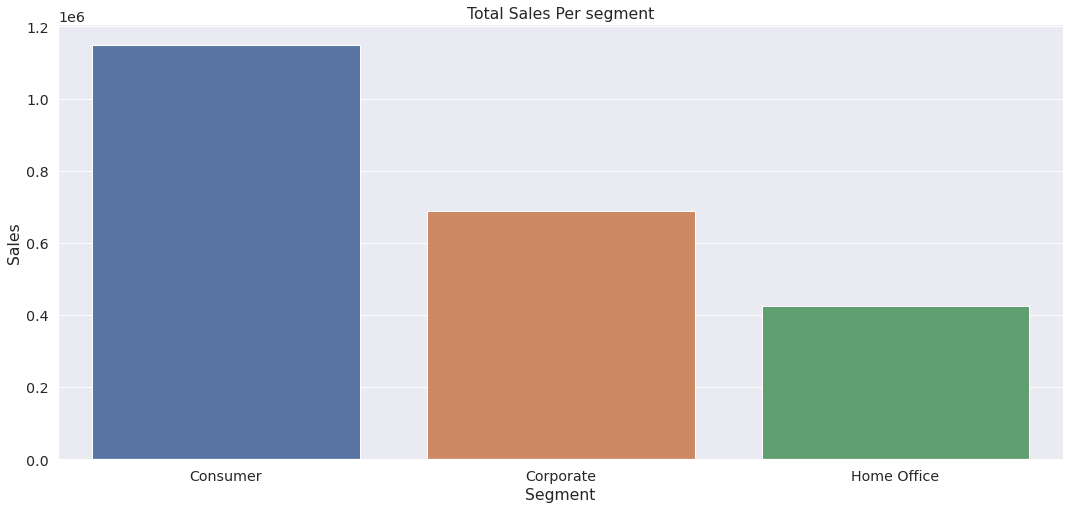

In [187]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(18,8));
plt.title('Total Sales Per segment')
sns.barplot(x='Segment', y='Sales',data = segment_sales);

**Regions that generates the maximum sales**

In [188]:
region_sales = pd.DataFrame(sales.groupby(sales['Region'])['Sales'].sum()).reset_index()
region_sales = region_sales.nlargest(4, 'Sales')
region_sales.head()

,Region,Sales
3,West,710219.6845
1,East,669237.3540
0,Central,492646.9132
2,South,389151.4590


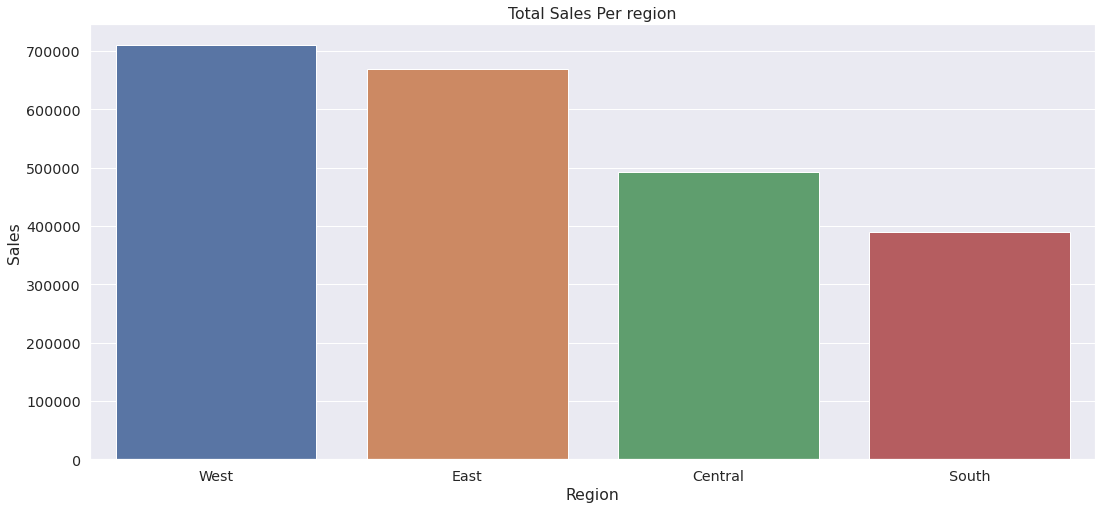

In [189]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(18,8));
plt.title('Total Sales Per region')
sns.barplot(x='Region', y='Sales',data = region_sales);


**Product category that generates the maximum sales. **

In [190]:
sales['Category'].value_counts()

Office Supplies    5909
Furniture          2077
Technology         1813
Name: Category, dtype: int64

In [191]:
category_sales = pd.DataFrame(sales.groupby(sales['Category'])['Sales'].sum()).reset_index()
category_sales = category_sales.nlargest(3, 'Sales')
category_sales.head()

,Category,Sales
2,Technology,827455.8730
0,Furniture,728377.2037
1,Office Supplies,705422.3340


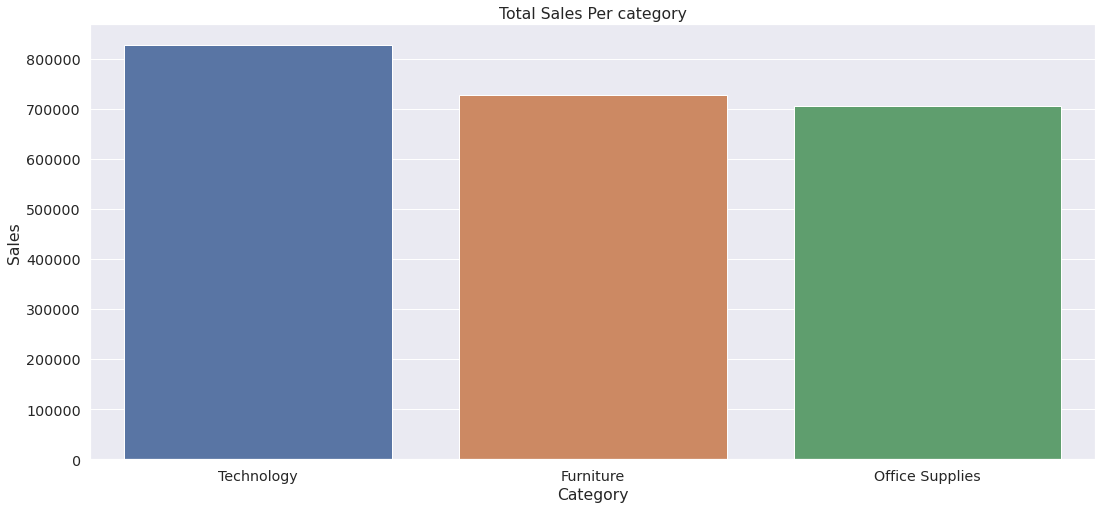

In [192]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(18,8));
plt.title('Total Sales Per category')
sns.barplot(x='Category', y='Sales',data = category_sales);

**Sub Category that generates the maximum sales**

In [193]:
sales['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          606
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [194]:
sub_category_sales = pd.DataFrame(sales.groupby(sales['Sub-Category'])['Sales'].sum()).reset_index()
sub_category_sales = sub_category_sales.nlargest(15, 'Sales')
sub_category_sales.head(15)

,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322541.3590
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


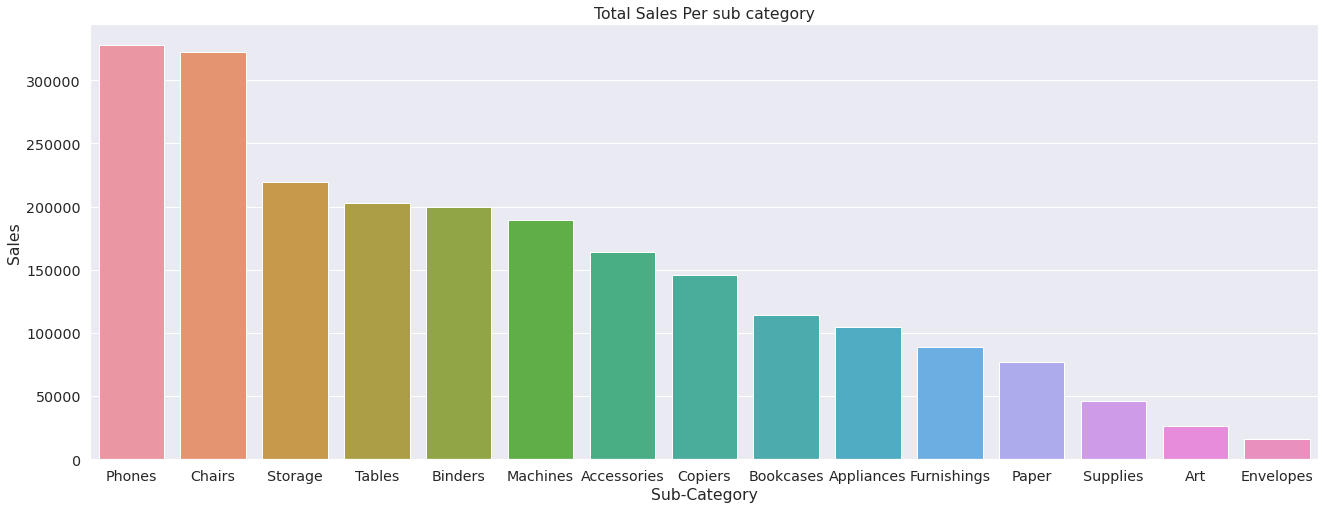

In [195]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(22,8));
plt.title('Total Sales Per sub category')
sns.barplot(x='Sub-Category', y='Sales',data = sub_category_sales);

**State with maximum sales**

In [196]:
state_sales = pd.DataFrame(sales.groupby(sales['State']).sum()['Sales'].reset_index())
state_sales = state_sales.nlargest(15, 'Sales')
state_sales.head(15)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,74848.9780
44,Virginia,70636.7200


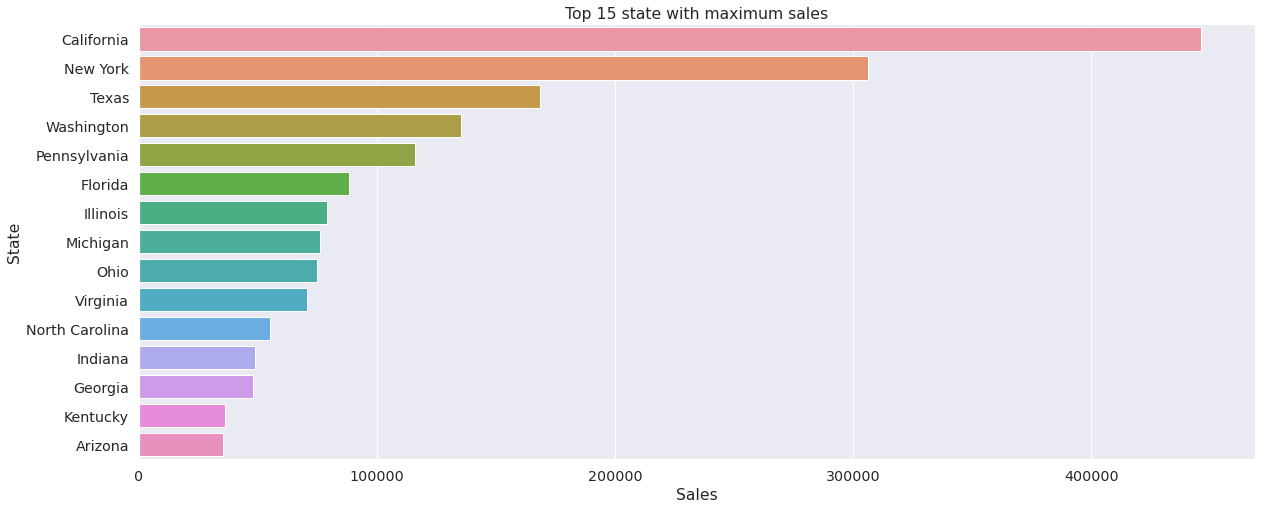

In [197]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top 15 state with maximum sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y='State',data = state_sales);

**Top selling product**

In [198]:
product_sales = pd.DataFrame(sales.groupby(sales['Product Name']).sum()['Sales'].reset_index())
product_sales = product_sales.nlargest(15,'Sales')
product_sales.head(15)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.8240
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.3840
444,Cisco TelePresence System EX90 Videoconferenci...,22638.4800
785,HON 5400 Series Task Chairs for Big and Tall,21870.5760
685,GBC DocuBind TL300 Electric Binding System,19823.4790
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.5000
804,Hewlett Packard LaserJet 3310 Copier,18839.6860
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.8950
682,GBC DocuBind P400 Electric Binding System,17965.0680
812,High Speed Automatic Electric Letter Opener,17030.3120


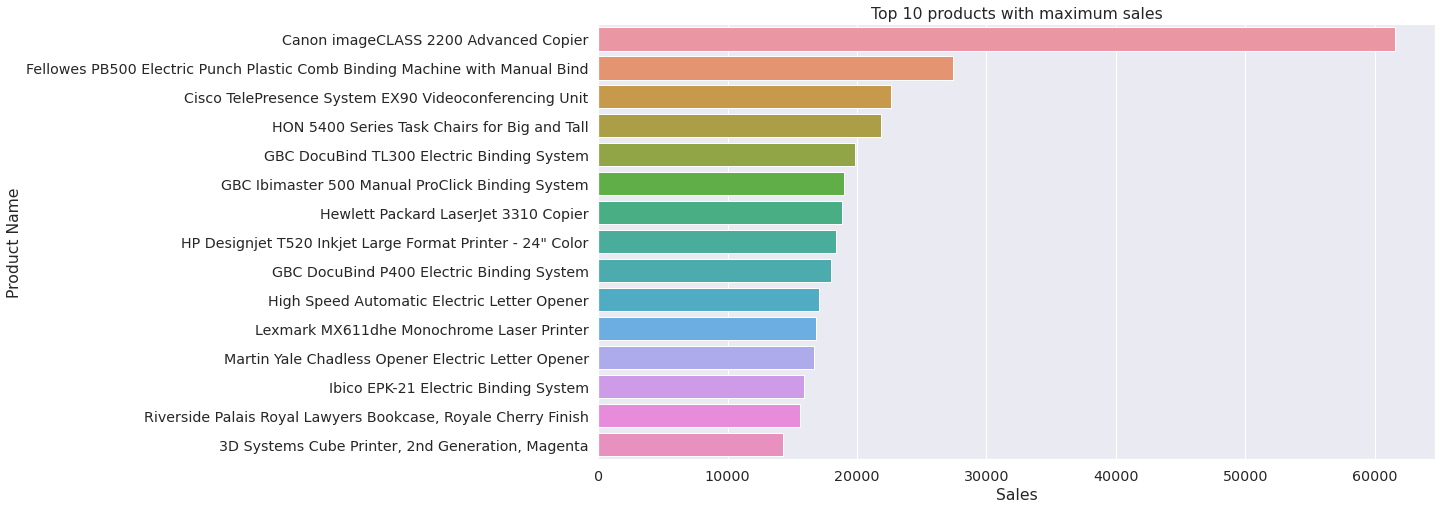

In [199]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Top 10 products with maximum sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y='Product Name',data = product_sales);


**Sales of year 2016-2018**

In [200]:
year_sales = pd.DataFrame(sales.groupby(sales['Order_year']).sum()['Sales'].reset_index())
year_sales = year_sales.nlargest(4,'Sales')
year_sales.head(4)

,Order_year,Sales
3,2018,722052.0192
2,2017,600192.5500
0,2015,479574.8361
1,2016,459436.0054


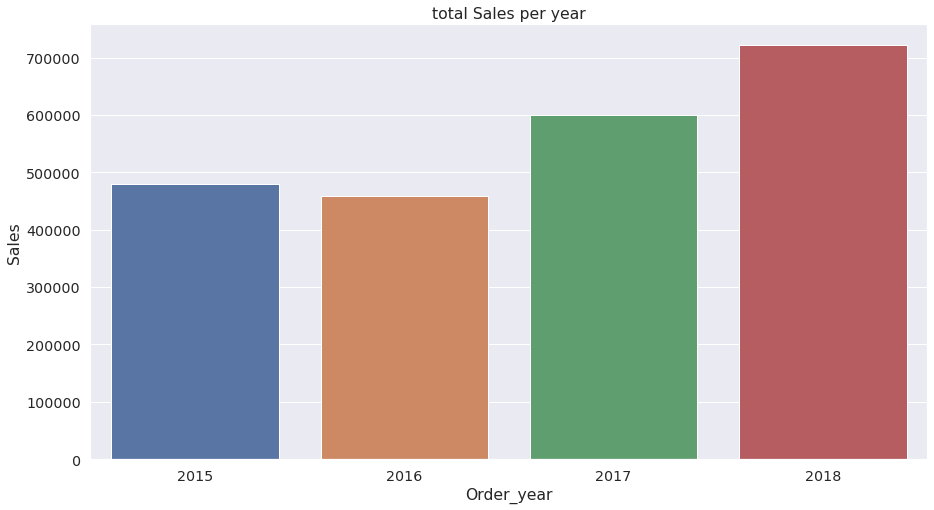

In [201]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('total Sales per year')
sns.set_style('darkgrid')
sns.barplot(x='Order_year', y='Sales',data = year_sales);

**Change over the years**

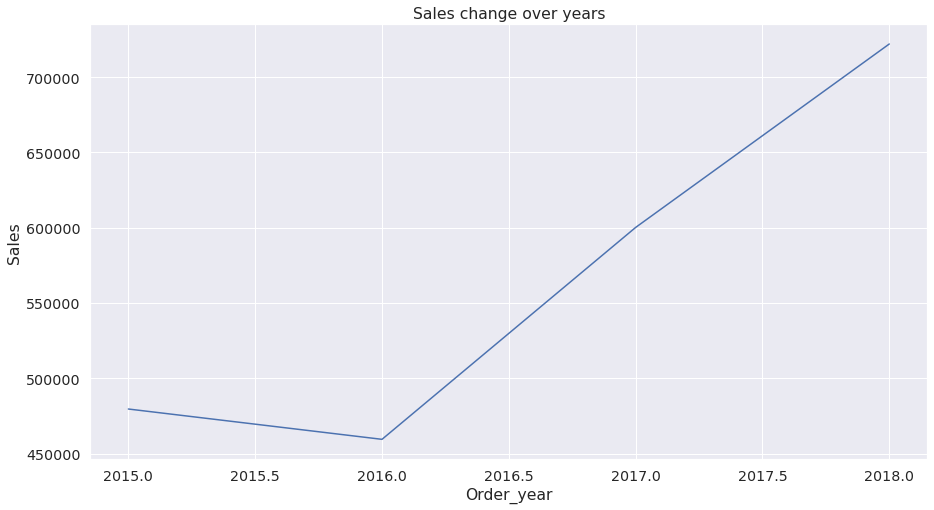

In [202]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Sales change over years')
sns.set_style('darkgrid')
sns.lineplot(x='Order_year', y='Sales',data = year_sales);

**Months with maximum sales from year 2016-18**

In [203]:
month_sales = pd.DataFrame(sales.groupby(sales['Order_Month']).sum()['Sales'].reset_index())
month_sales = month_sales.nlargest(12,'Sales')
month_sales.head(12)

,Order_Month,Sales
9,November,268768.7885
2,December,246266.5152
11,September,245155.0671
7,March,212256.1344
1,August,207601.7939
10,October,183851.9562
8,May,166000.7467
5,July,159472.5865
4,January,155990.9154
0,April,142702.8761


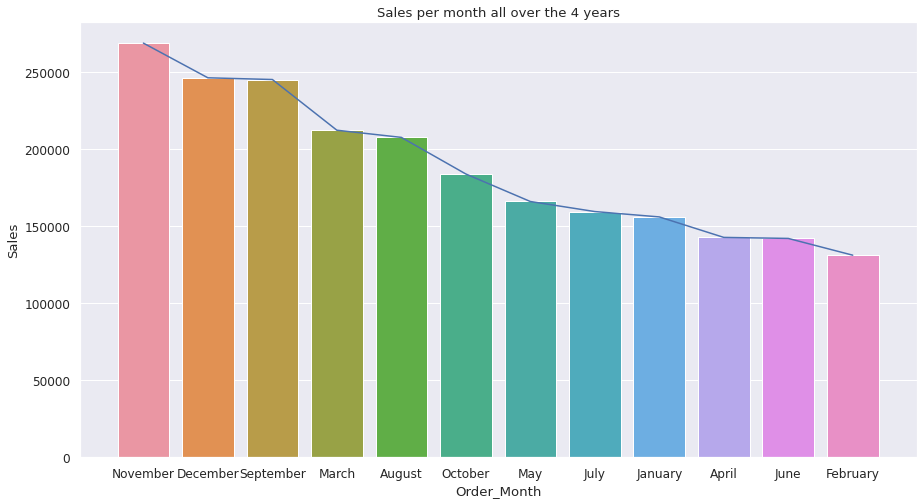

In [204]:
sns.set(font_scale=1.1)
plt.figure(figsize=(15,8));
plt.title('Sales per month all over the 4 years')
sns.set_style('darkgrid')
sns.barplot(x='Order_Month', y='Sales',data = month_sales);
sns.lineplot(x='Order_Month', y='Sales',data = month_sales);

**Change in monthly sales in 2018**

In [205]:
year_2018 = sales.loc[sales['Order_year'] == 2018]

monthly_sales_2018 = pd.DataFrame(sales.groupby(year_2018['Order_Month']).sum()['Sales'].reset_index())
monthly_sales_2018 = monthly_sales_2018.nlargest(12,'Sales')
monthly_sales_2018.head(12)

,Order_Month,Sales
9,November,87997.6400
1,August,75408.7840
7,March,74748.6238
11,September,73153.3640
10,October,65501.1622
4,January,59767.0910
2,December,56959.2358
5,July,53942.7755
3,February,48928.8334
6,June,46912.8475


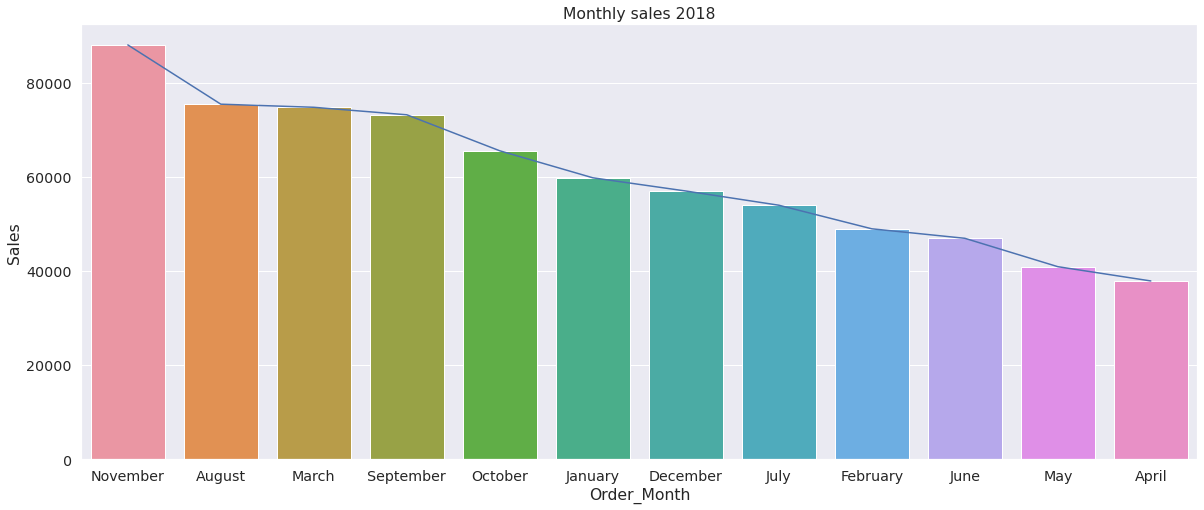

In [206]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2018')
sns.lineplot(x= 'Order_Month', y='Sales', data = monthly_sales_2018);
sns.barplot(x='Order_Month', y='Sales',data = monthly_sales_2018);

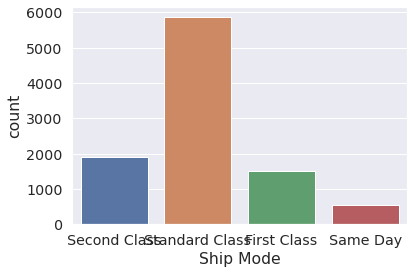

In [207]:
sns.countplot(sales['Ship Mode'])

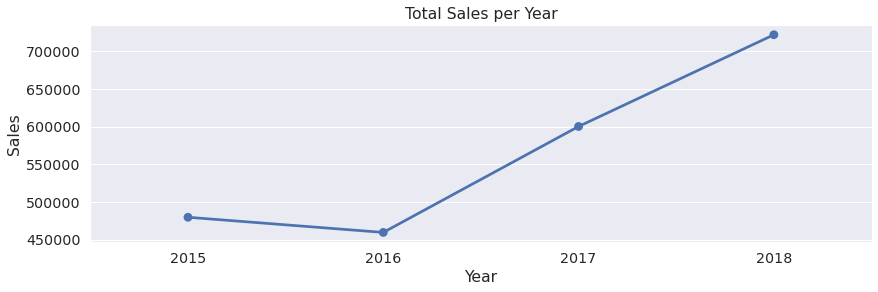

In [208]:
# Let's examine Sales over time.
a = pd.DataFrame(sales.groupby(by=['Order_year']).sum())

plt.figure(figsize=(14, 4))
sns.pointplot(x=a.index, y='Sales', data=a)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")

plt.show()

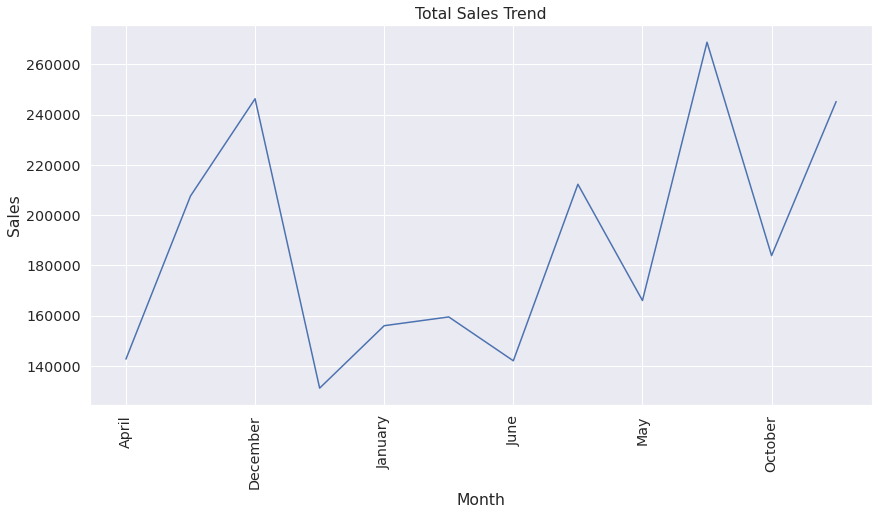

In [209]:
# Year-to-Year observation of TotalSales.
a = pd.DataFrame(sales.groupby(by=['Order_Month']).sum())['Sales']

plt.figure(figsize=(14, 7))
a.plot(kind='line')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title("Total Sales Trend")

plt.xticks(rotation=90)
plt.show()

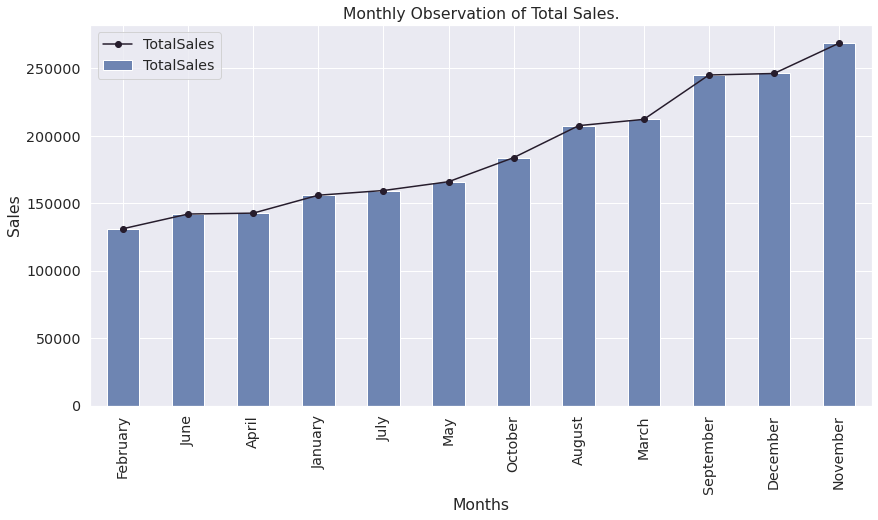

In [210]:
# Monthly observation of Sales Pattern.
monthSales_data = sales.groupby(by='Order_Month').sum()['Sales']
monthSales_data = monthSales_data.sort_values()

# plot
monthSales_data.plot(kind='line', figsize=(14, 7), color="#261C2C", marker='o', label='TotalSales')
monthSales_data.plot(kind='bar', figsize=(14, 7), color="#6E85B2", label='TotalSales')

plt.xlabel('Months')
plt.ylabel("Sales")
plt.title("Monthly Observation of Total Sales.")

plt.legend()
plt.show()


From above bar plot, we can see that, overall growth in sales obseved in Months of September, December, November. Let's examine, if the same sales pattern observed in each year.

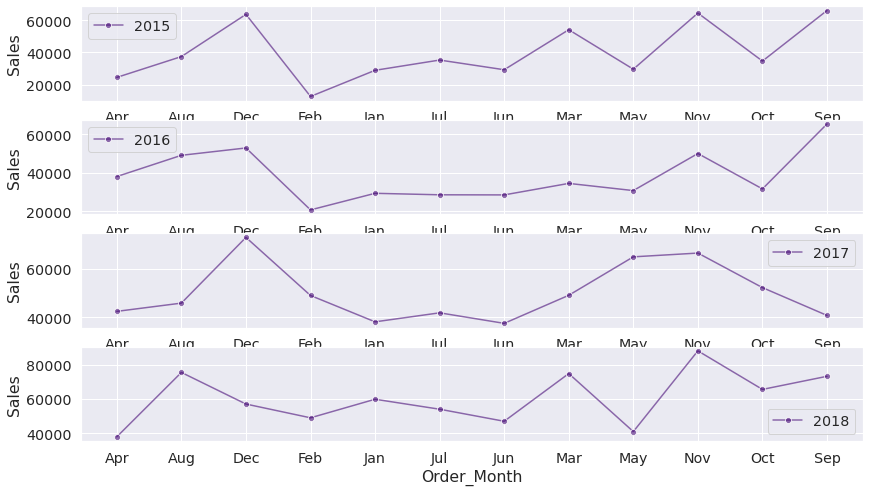

In [211]:
# Monthly Year-to-Year observation of Sales Pattern.
monthSales_data = sales.groupby(by=['Order_year', 'Order_Month']).sum()

a = monthSales_data.reset_index()
a['Order_Month'] = a.Order_Month.apply(lambda x:x[:3])
monthSales_data = a.groupby(by=['Order_year', 'Order_Month']).sum()['Sales']

# plot
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))

yrs = [2015, 2016, 2017, 2018]
for i in range(4):
    yr = yrs[i]
    a = monthSales_data.loc[yr]
    ax[i] = sns.lineplot(x= a.index, y=a.values, data=a, ax=ax[i], label=yr, marker="o", color="#3F007190")
    ax[i].set_ylabel('Sales')

plt.show()

We can see that,There is rise in months of December, November, and September. The same pattern observed in each year, however it appears at the different levels.



In [212]:
sales['day_of_week'] = sales['Order Date'].dt.weekday

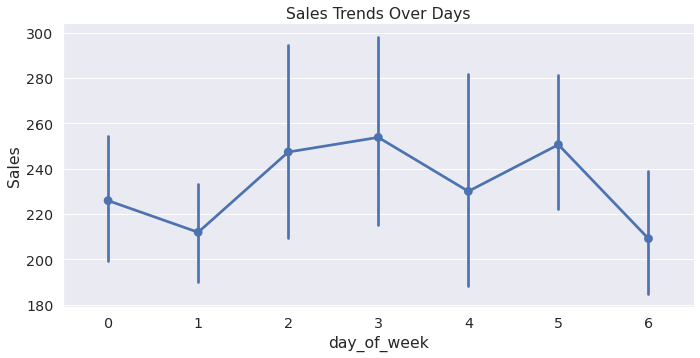

In [213]:
# Sales trends over days.
sns.catplot(data=sales, x='day_of_week', y='Sales', kind='point', aspect=2)

plt.title("Sales Trends Over Days")
plt.show()

We can see that, there is maximum sales on Wednesday and Thursday.

**Density Plot**

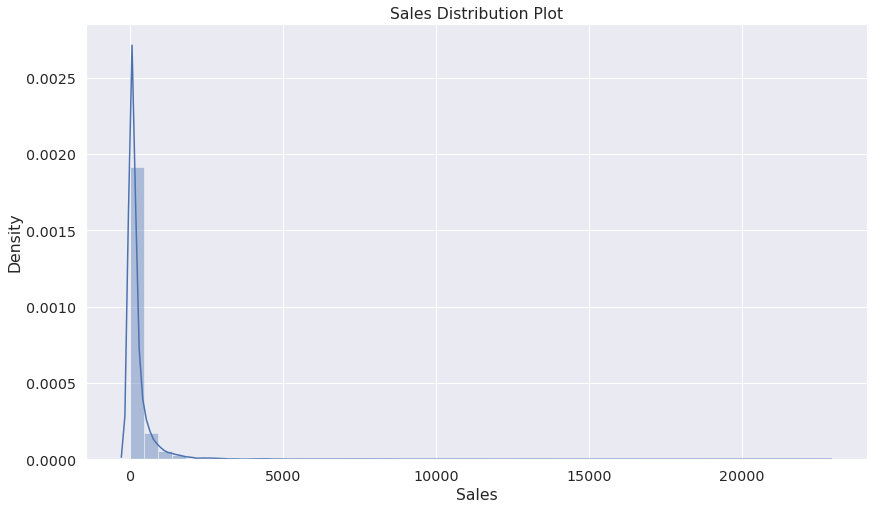

In [214]:
# Sales Distribution
plt.figure(figsize=(14, 8))
sns.distplot(sales.Sales)

plt.title('Sales Distribution Plot')
plt.show()

Distribution is not Gaussian Distribution. The shape has long right tail, which means that data is Right Skewed. The most of the sales values are less than 50.

**Time Series Analysis**

To use the time series forecasting models, we need to ensure that the our data is stationay. The time series is stationay when data has constant mean, constant variance, and constant covariance with respect to time.

There are two ways to check Stationarity of Time Series.

1. Rolling Mean:
A rolling analysis of a time series model is often used to assess the model’s stability over time. The window is rolled (slid across the data) on a weekly basis, in which the average is taken on a weekly basis. Rolling Statistics is a visualization test, where we can compare the original data with the rolled data and check if the data is stationary or not.

2. Augmented Dickey-Fuller test:
The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us to understand if the series is stationary or not. The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root(i.e data is non-stationary), with the alternative that there is no unit root(i.e data is stationary). if the p-value is less than critical value (i.e 0.05) we reject the null hypothesis which means that data is Stationary.


In [215]:
sales.head(4)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Order_year,Order_Month,day_of_week
0,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,August,4
1,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,August,4
2,2017-12-06,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,December,2
3,2016-11-10,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,November,3


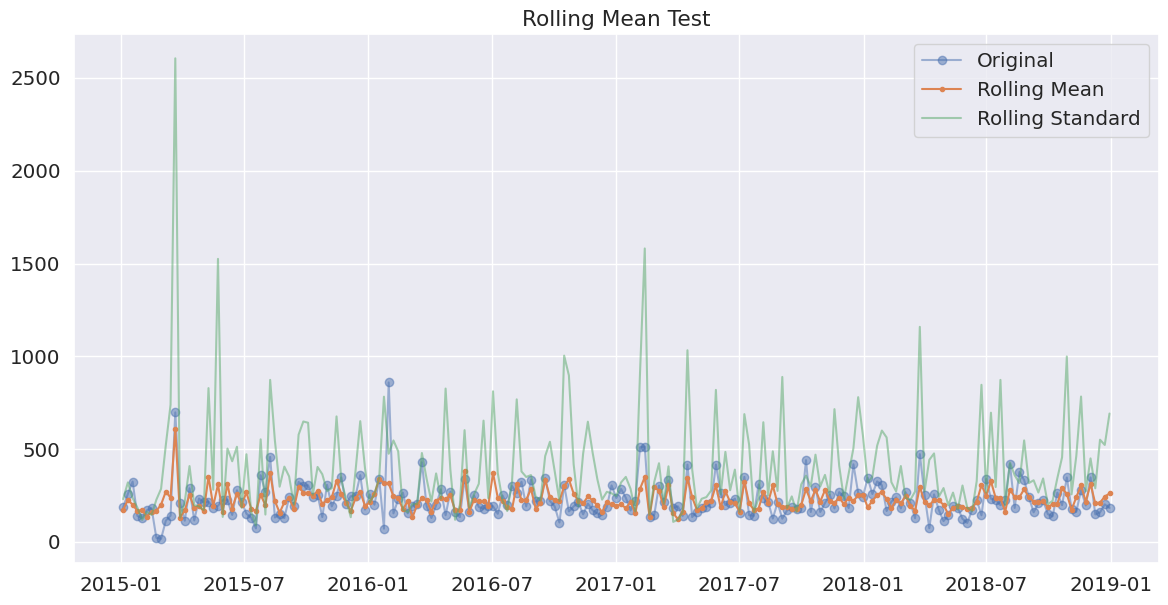

In [216]:
# prepare data
sales_data = sales[['Order Date', 'Sales']]
sales_data = sales_data.set_index('Order Date')

# calculating rolling statistics.
roll_mean = sales_data.rolling(window=7).mean()
roll_std = sales_data.rolling(window=7).std()

# plotting rolling statistics with orignal data mean.
plt.figure(figsize=(14, 7), dpi=100)
data_mean = plt.plot(sales_data.resample('W').mean(), label='Original', marker="o", alpha=0.5)
mean = plt.plot(roll_mean.resample('W').mean(), label="Rolling Mean", marker=".")
std = plt.plot(roll_std.resample('W').std(), label="Rolling Standard", alpha=0.5)

plt.title("Rolling Mean Test")
plt.legend()
plt.show()

In [217]:
sales_data.head(4)

,Sales
Order Date,
2017-08-11,261.9600
2017-08-11,731.9400
2017-12-06,14.6200
2016-11-10,957.5775


In [218]:
from statsmodels.tsa.stattools import adfuller

print("Augmented Dickey-fuller test result: ")
result = adfuller(sales_data.Sales, autolag="AIC")

print("ADF test statistic: ", result[0])
print("p-value:", result[1])

print("Critical Values:")
for key, val in result[4].items():
    print("\t%s : %f" %(key, val))

Augmented Dickey-fuller test result: 
ADF test statistic:  -98.33059943935697
p-value: 0.0
Critical Values:
	1% : -3.431018
	5% : -2.861835
	10% : -2.566927


Above plot show that, The Mean and Standard deviation does not change over time much which means that the Mean and Deviation is constant.

The result output of ADF (Augmented Dickey-Fuller) statistical test has value -98.33059943935697 which is smaller than critical value at 1% of -3.431018. This suggest that we can reject the null hypothesis with the significance level less than 1%. Rejecting null hypothesis means that, The time series is stationary and does not have time-dependent structure.

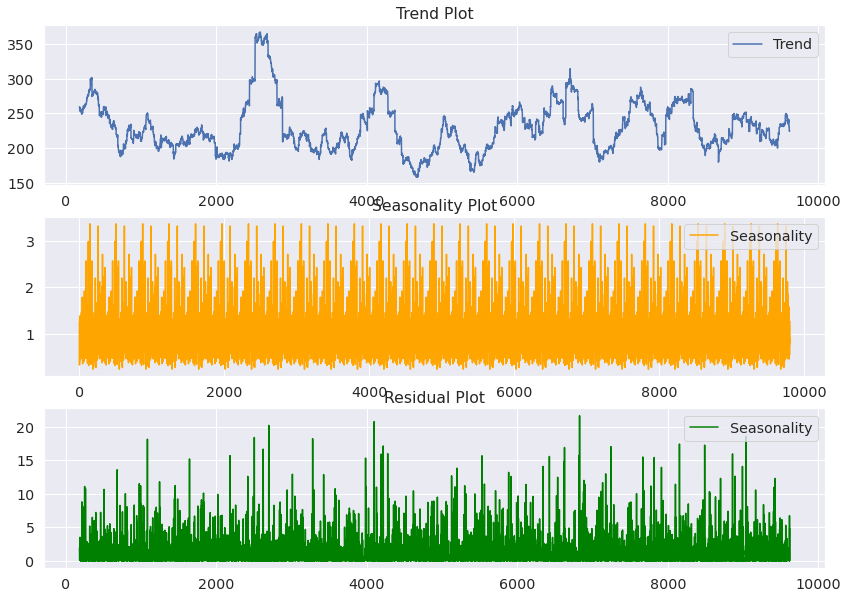

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Sales, model = 'multiplicative', freq=365)

estimated_seasonal = decomposition.seasonal
estimated_trend = decomposition.trend
estimated_residuals = decomposition.resid

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14, 10))
axs[0].plot(estimated_trend, label='Trend')
axs[0].set_title("Trend Plot")
axs[0].legend()

axs[1].plot(estimated_seasonal, label='Seasonality', color='orange')
axs[1].set_title("Seasonality Plot")
axs[1].legend()

axs[2].plot(estimated_residuals, label='Seasonality', color='Green')
axs[2].set_title("Residual Plot")
axs[2].legend()
plt.show()

The above line plot does not show any trends in data. So, There no differencing is required.

**AutoRegressive Integrated Moving Average (ARIMA) Model**

In [220]:
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

sales = pd.DataFrame(sales.groupby(by=['Order Date']).sum()['Sales'])

# Fitting ARIMA model
model = sm.tsa.statespace.SARIMAX(sales,order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
result = model.fit()
print("SARIMAX Summary")
print(result.summary().tables[1])

SARIMAX Summary
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0827      0.030      2.754      0.006       0.024       0.142
ar.S.L12      -0.0313      0.031     -0.997      0.319      -0.093       0.030
ma.S.L12      -0.9999      0.014    -69.515      0.000      -1.028      -0.972
sigma2      5.226e+06   2.76e-09   1.89e+15      0.000    5.23e+06    5.23e+06


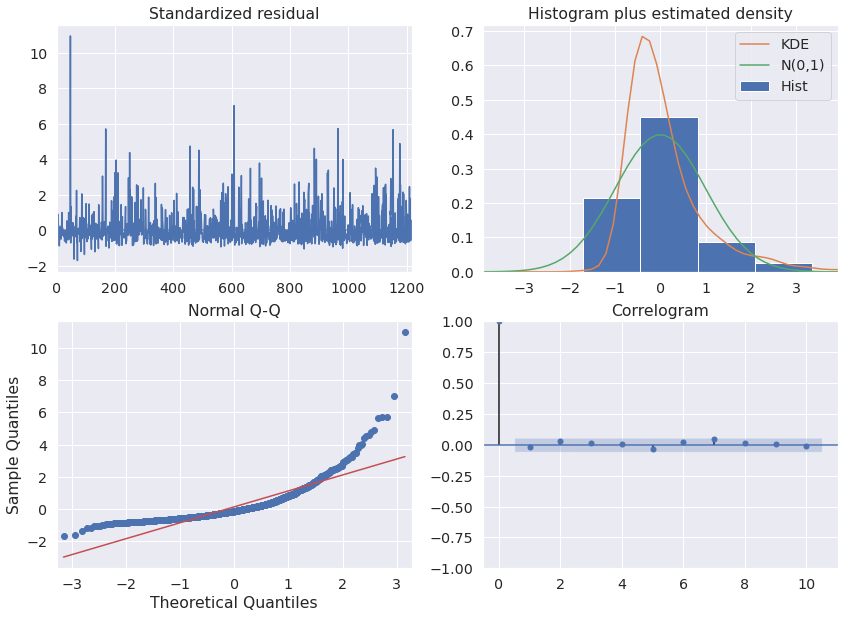

In [221]:
# Visualization of the performance of our model
result.plot_diagnostics(figsize=(14, 10))
plt.show()

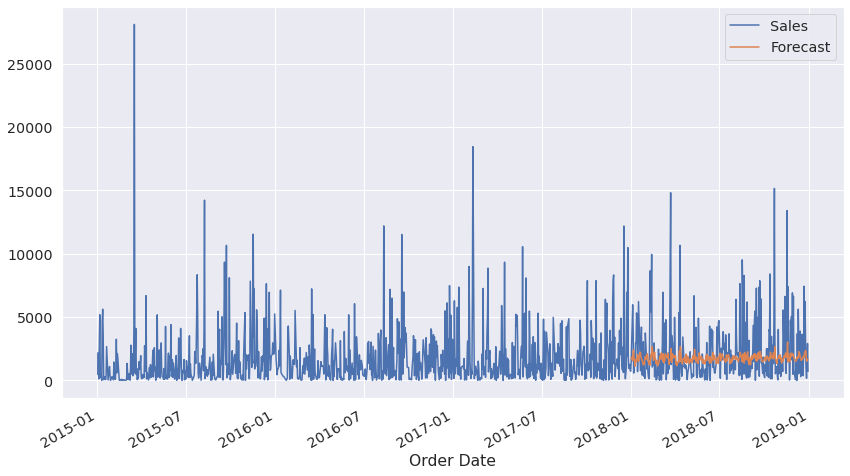

In [222]:
sales['Forecast']= pd.DataFrame(result.predict(start='2018-01-01', end='2018-12-30', dynamic=False))

# visualization for the same
sales.plot(figsize=(14, 8))
plt.show()

In [223]:
from math import sqrt
from sklearn.metrics import mean_squared_error

actual = sales.loc['2018-01-01':'2018-12-30']['Sales']
preds = sales.loc['2018-01-01':'2018-12-30']['Forecast']
rmse_sarima = sqrt(mean_squared_error(preds, actual))
print("Root Mean Squared Error for SARIMAX:", rmse_sarima)

Root Mean Squared Error for SARIMAX: 2449.971748357956
